### All code below was used to create the Data class

In [7]:
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

def sigmoid(x, L ,x0, k, b):
    #x input data
    # L scales output from [0,L]
    # x0 is the midpoint
    # k scales the input
    # b is the offset of output to [b,L+b]
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

def toyData(function = sigmoid, k = 1, x0 = 0, L = 1, b = 0, mu = 0, std = 0.05):
    

    x = np.linspace(-10, 10, 100)  # 100 linearly spaced numbers from -10 to 10
    noise = np.random.normal(mu, std, x.shape)
    x_noisy = x + noise

    y = function(x_noisy, L ,x0, k, b)
    y_noisy = y + noise
     
    return(x_noisy,y_noisy)

def fitCurve(x, y, function = sigmoid):
    p0 = [max(y), np.median(x),1,min(y)] # this is an mandatory initial guess
    popt, pcov = curve_fit(function, x, y,p0, maxfev=10000,method='dogbox')
    fit_y = sigmoid(x, *popt)

    return(fit_y, popt)



x,y_noisy = toyData()
fit_y, params = fitCurve(x, y_noisy)

In [6]:
plt.scatter(x_noisy, y_noisy, label='Noisy data')
plt.plot(x, y, 'k-', label='Orginal')
plt.plot(x, fit_y, 'r-', label='Fitted')
plt.title('Sample Sigmoid Curve with Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


NameError: name 'x_noisy' is not defined

In [7]:
def electrodePlot():
    all_params = []
    fig, axs = plt.subplots(4,4, figsize= (15,15))
    for i in range(16):
        row = i // 4  # Calculate the row index
        col = i % 4   # Calculate the column index
        x, y_noisy = toyData(mu = np.random.rand(),std = 0.2)
        fit_y, params = fitCurve(x, y_noisy)
        all_params.append(params)
        axs[row, col].scatter(x, y_noisy, label='Noisy data')
        axs[row, col].plot(x, fit_y, 'r-', label='Fitted')
        axs[row, col].set_xlabel('x')
        axs[row, col].set_ylabel('y')
        axs[row, col].set_title('Electrode ' + str(i))
    plt.tight_layout()
    plt.show()
    df = pd.DataFrame(all_params, columns = ['L','x0','k','b'])
    return(df)

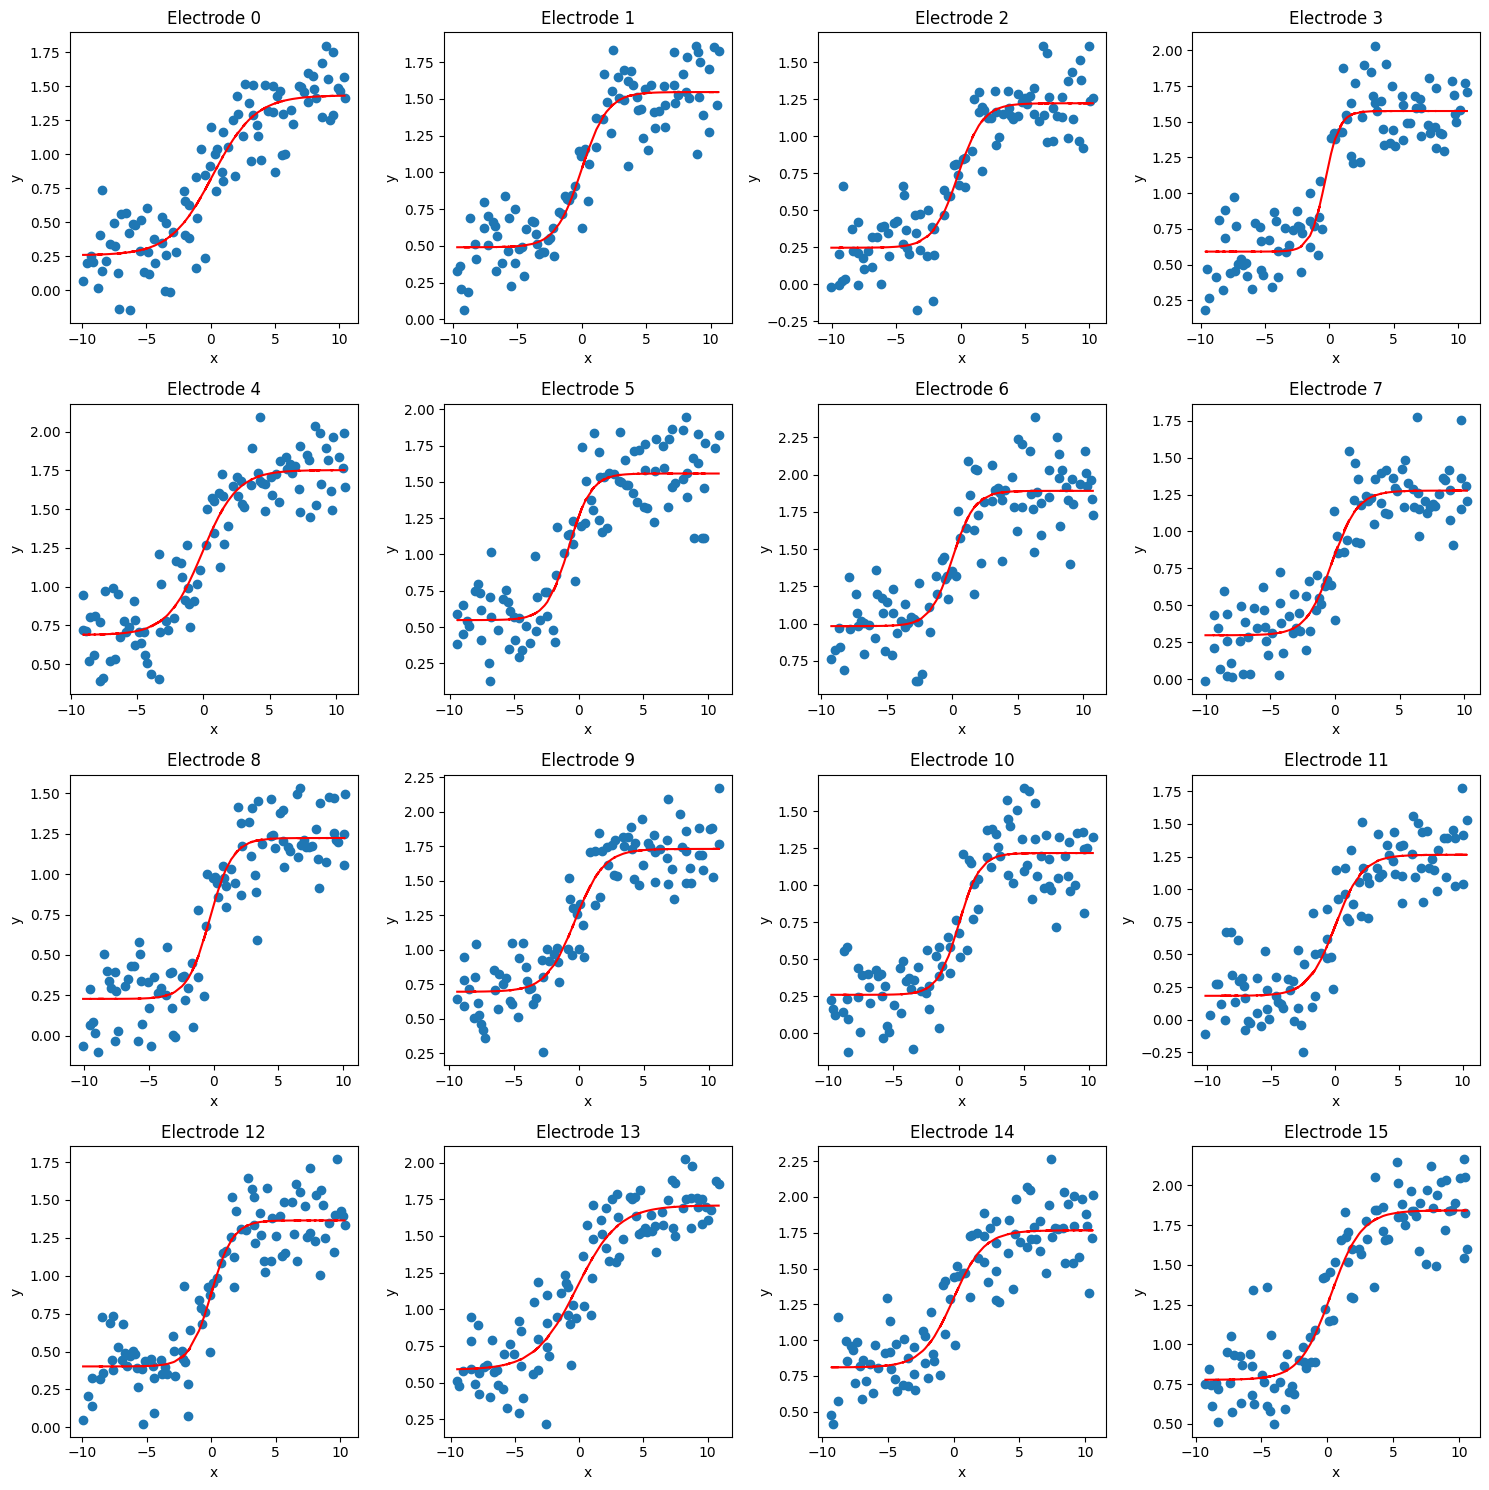

,L,x0,k,b
0,1.175050,0.158979,0.607101,0.256461
1,1.056287,-0.023292,0.995247,0.490765
2,0.976668,-0.204750,1.046543,0.246633
3,0.984825,-0.325401,1.766822,0.590788
4,1.063908,-0.087075,0.757414,0.688643
5,1.008963,-0.771444,1.170724,0.548277
6,0.907173,0.000658,1.186326,0.983124
7,0.978294,-0.245977,1.008151,0.298130
8,0.996947,-0.287366,1.144914,0.227096
9,1.034064,-0.282732,0.905376,0.696466


In [8]:
df = electrodePlot()
df

### Trying to fit to Matt's Data

In [8]:
import scipy.io

mattData = scipy.io.loadmat("C:/Users/Jjmas/OneDrive/Desktop/Research/Anne/Characterization.mat")

x_data = mattData['x_data']
y_data = mattData['y_data']
pulseWidth = x_data[0][0][0]


In [9]:
def electrodePlotMatt():
    fig, axs = plt.subplots(1,5, figsize= (15,5))
    angles= [ 'Index','MRS','Wrist']
    muscles= ['EDC','FDP','EIP',
             'ECRB', 'FCR' ]
    all_params = []
    for j in range(5):
        for i in range(3):
            # try:
            fit_y, params = fitCurve(pulseWidth,  y_data[j][i].flatten())
            all_params.append(list(params) + [j,i])
            # except:
            # print('Could not fit Line for ' + muscles[j] + ' ' + angles[i])
            axs[j].scatter(pulseWidth, y_data[j][i], label=angles[i])
            axs[j].plot(pulseWidth, fit_y, linestyle = '--')
        axs[j].set_title(muscles[j])
        axs[j].set_xlabel('Pulse Width')
        axs[j].set_ylabel('Angle Change')
    plt.legend()
    fig.suptitle('Electrode Characterization')
    plt.tight_layout()
    plt.show()
    df = pd.DataFrame(all_params, columns = ['L','x0','k','b', 'Muscle', 'Angle'])
    return(df)

C:\Users\Jjmas\AppData\Local\Temp\ipykernel_47712\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


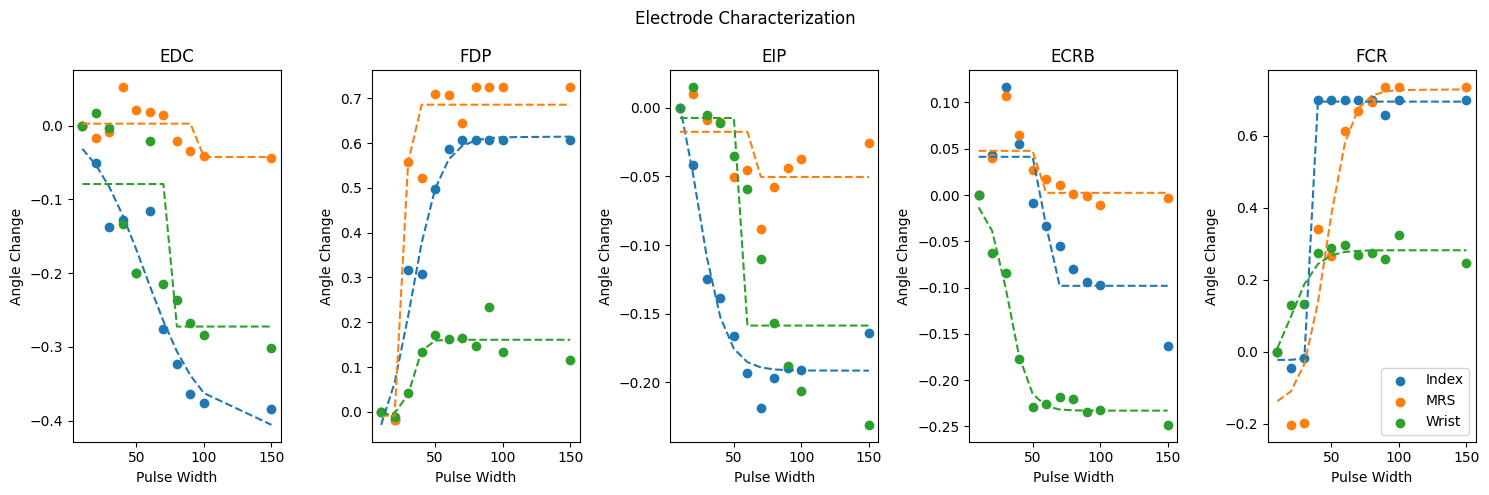

,L,x0,k,b,Muscle,Angle
0,-0.422066,56.373270,0.046981,0.011327,0,0
1,-0.045139,93.583864,60.908073,0.002543,0,1
2,-0.193110,74.864581,60.966773,-0.079286,0,2
3,0.723719,32.314525,0.093241,-0.109434,1,0
4,0.694173,29.132502,1.708981,-0.008621,1,1
5,0.167990,33.546866,0.272341,-0.007193,1,2
6,-0.246089,23.088013,0.099170,0.054725,2,0
7,-0.032878,63.139982,61.000000,-0.017468,2,1
8,-0.151125,57.517192,61.002435,-0.007417,2,2
9,-0.139400,59.997715,60.999957,0.041300,3,0


In [10]:
realParams = electrodePlotMatt()
realParams.describe()
realParams

### Modeling independent electrode interactions and possible angle space

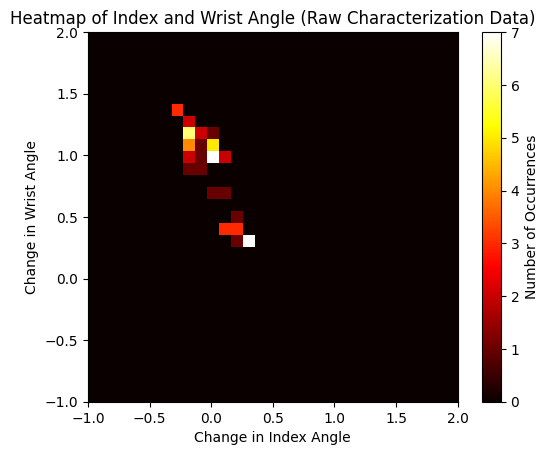

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
class AngleDict:
    def __init__(self, start=-0.5, end=0.5, binSize=0.1):
        self.start = start
        self.end = end
        self.binSize = binSize
        self.d = self.createDict()

    def createDict(self):
        self.d = {}
        self.bins = np.arange(self.start, self.end + self.binSize, self.binSize)
        for x in self.bins:
            # index = round(x, 1) + 0
            for y in self.bins:
                # wrist = round(y, 1) + 0
                key = (float(f"{x:.1f}"), float(f"{y:.1f}"))
                self.d[key] = 0
        return self.d

    def dictChecker(self, pose1, pose2):
        # Assuming pose1 and pose2 are 2D arrays of shape (31, 11)
        rows, cols = pose1.shape
        for i in range(rows):
            for j in range(cols):
                key = (float(f"{pose1[i, j]:.1f}"), float(f"{pose2[i, j]:.1f}"))
                if key in self.d:
                    self.d[key] += 1
                else:
                    print(f'Key: {key} not in dictionary')

    def dictPlot(self):
        heatmap = (np.array(list(self.d.values())).reshape((len(self.bins), len(self.bins))))
        plt.imshow(heatmap, cmap='hot',interpolation='nearest',extent=[self.start, self.end, self.start, self.end])
        cbar = plt.colorbar()
        cbar.locator = ticker.MaxNLocator(integer=True)  #fix to make sure it's only integers
        cbar.update_ticks()
        cbar.set_label('Number of Occurrences')
        plt.title('Heatmap of Index and Wrist Angle (Raw Characterization Data)')
        plt.xlabel('Change in Index Angle')
        plt.ylabel('Change in Wrist Angle')
        plt.show()

# Usage:
test = AngleDict(start=-1, end=2, binSize=0.1)
indexTrue, wristTrue = y_data[:, 0], y_data[:, 2]
test.dictChecker(indexTrue, wristTrue)
test.dictPlot()


In [11]:
import itertools
electrodeStates = list(itertools.product([0,1], repeat=5))  # all possible electrode states
len(electrodeStates)

32

In [12]:
def sigmoidSum(state, realParams):
    index, mrs, wrist = 0, 0, 0
    for e, is_active in enumerate(state):
        # print(e)
        # index, mrs, wrist = 0, 0, 0
        # print(e, is_active)
        if (is_active):
            param = realParams[(realParams['Muscle'] == e) & (realParams['Angle'] == 0)].loc[:,['L','x0','k','b']].values[0]
            index+= sigmoid(pulseWidth, *param )
            param = realParams[(realParams['Muscle'] == e) & (realParams['Angle'] == 1)].loc[:,['L','x0','k','b']].values[0]
            mrs+= sigmoid(pulseWidth, *param )
            param = realParams[(realParams['Muscle'] == e) & (realParams['Angle'] == 2)].loc[:,['L','x0','k','b']].values[0]
            wrist+= sigmoid(pulseWidth, *param )
    return index, mrs, wrist

testSum = sigmoidSum(electrodeStates[4], realParams)

C:\Users\Jjmas\AppData\Local\Temp\ipykernel_47712\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_47712\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


In [14]:
test2 = np.array(angle_spaces[1:])
index = test2[:,0]
wrist = test2[:,2]

In [13]:
angle_spaces = [sigmoidSum(state, realParams) for state in electrodeStates]
len(angle_spaces)

C:\Users\Jjmas\AppData\Local\Temp\ipykernel_47712\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_47712\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_47712\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_47712\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_47712\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_47712\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_47712\2567883890.py:12: RuntimeWarning: overflow encount

32